# Titanic: Machine Learning from Disaster (Kaggle)
https://www.kaggle.com/c/titanic

### Competition Description (from Kaggle):
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### Overview of Dataset

The data have been divided into two groups:
* Training set (train.csv)
* Testing set (test.csv)

Note that the training set includes the ground truth for each passenger (here, survival outcome). The test set does **not** include the ground truth for the passengers.

A file named **gender_submission.csv** is also included, which is a set of predictions that assume that all and only remal passengers survive as an example of what the Kaggle submission file should look like.

#### Data Dictionary 
|Variable  |Definition  |Key                |
|----------|------------|-------------------|
|survival  |Survival    |0=no, 1=yes        |
|pclass    |Ticket class|1=1st, 2=2nd,<br>3=3rd|
|sex       |Sex         |                   |
|Age       |Age in years|                   |
|sibsp     |# of siblings/spouses<br>aboard the titanic||
|parch     |# of parents/children<br>aboard the titanic||
|ticket    |Ticket number||
|fare      |Passenger fare||
|cabin     |Cabin number||
|embarked  |Port of Embarkation|C = Cherbourg, Q = Queenstown<br>S=Southampton||

#### Variable Notes
**pclass**: A proxy for socio-economic status (SES)
* 1st = Upper Class
* 2nd = Middle Class
* 3rd = Lower Class

**age**: Age is fractional if < 1. If estimated, it is in the form of xx.5.

**sibsp**: Family relations defined as follows:
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiances ignored)

**parch**: Family relations defined as follows:
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children traveled with only a nanny; thus, **parch**=0

### Some considerations based on my knowledge of the event

It is known that passengers were told _women and children first_ during the evactuation; thus, I would expect women and children to have a higher probability of survival. Although not included in this dataset, I'd expect crew members to have a lower probability of survival given that they assisted passengers in loading lifeboats.

Regarding the variables:
* **pclass** -- I'd expect the survival probability to follow the order Upper > Middle > Lower.
* **age** -- This variable can be used to distinguish children from adults. I'd expect survival probability to follow the order Children > Adults.
* **sex** -- I'd expect survival probability to follow the order Female > Male.
* **sibsp** -- This variable indicates siblings. I'd expect that if one sibling survived, then the probability of another sibling surviving is greater as they are likely to be together. I do not expect husband/wife to be greatly correlated as I'd expect the probability of a wife surviving to be greater than that of her husband surviving.
* **parch** -- I'd expect that if a child survives, the probability of their mother surviving is greater than that of a single female or of a mother who's child did not survive (given that the mother is likely to be with her children).
* **ticket** -- I'm not familiar with how ticket numbers worked with the Titanic; however, I'd assume that lower ticket numbers correlate to those that were first sold and are thus most likely to be related with the upper class (as they'd be more apt to buy tickets ASAP)
* **fare** -- I'd expect higher fare to be correlated with a greater probability of survival
* **cabin** -- I'm not familiar with the cabin numbers aboard the Titanic; however, appears to correlate with deck (deeper decks less likely to survive).
* **embarked** -- According to Wikipedia (https://en.wikipedia.org/wiki/RMS_Titanic#Collecting_passengers), Southampton was the first port of departure, and a large number of first class passengers boarded the ship. A moderate number of first class passengers also boarded in Cherbourg, whereas most of the passengers who boarded the ship in Queenstown were third class passengers.


# Loading datasets and exploratory analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Loading the data and seeing what we're working with.

In [2]:
training_data = pd.read_csv('train.csv')
training_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Visualizing the data in terms of survival:

In [4]:
Pclass_survived = training_data[training_data['Survived']==1]['Pclass']
Pclass_deceased = training_data[training_data['Survived']==0]['Pclass']

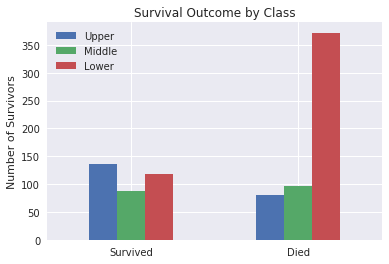

In [5]:
Pclass_outcome = pd.DataFrame([Pclass_survived.value_counts(), 
                               Pclass_deceased.value_counts()], index=['Survived', 'Died'])
Pclass_outcome.plot(kind='bar', stacked=False, title='Survival Outcome by Class', rot=0);
plt.ylabel('Number of Survivors');
plt.legend(['Upper', 'Middle', 'Lower']);

The above plot supports my initial hypothesis that there is a correlation with the passenger's social status and their probability of survival (lower class passengers clearly had a higher probability of dying).

Visualizing data in terms of sex:

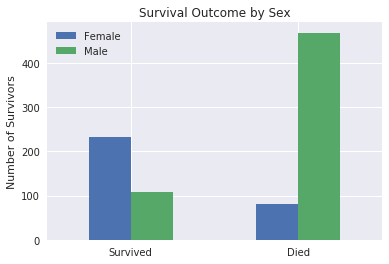

In [6]:
sex_survived = training_data[training_data['Survived']==1]['Sex']
sex_deceased = training_data[training_data['Survived']==0]['Sex']
sex_outcome = pd.DataFrame([sex_survived.value_counts(), sex_deceased.value_counts()],
                          index=['Survived', 'Died']);
sex_outcome.plot(kind='bar', stacked=False, title="Survival Outcome by Sex", rot=0);
plt.ylabel('Number of Survivors');
plt.legend(['Female', 'Male']);

The above plot supports my initial hypothesis that survival is correlated with sex, namely, male passengers were more likely to die than female passengers.

Visualizing the data in terms of port of embarkation:

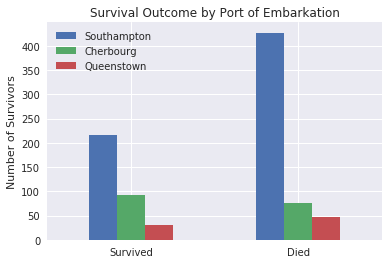

In [7]:
embark_survived = training_data[training_data['Survived']==1]['Embarked']
embark_deceased = training_data[training_data['Survived']==0]['Embarked']
embark_outcome = pd.DataFrame([embark_survived.value_counts(), embark_deceased.value_counts()], 
                             index=['Survived', 'Died'])
embark_outcome.plot(kind='bar', title='Survival Outcome by Port of Embarkation', rot=0);
plt.ylabel('Number of Survivors');
plt.legend(['Southampton', 'Cherbourg', 'Queenstown']);

Visualizing the data in terms of age:

In [8]:
age_survived = training_data[training_data['Survived']==1]['Age']
age_deceased = training_data[training_data['Survived']==0]['Age']

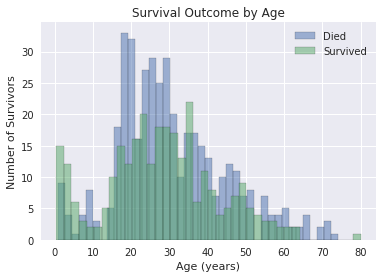

In [9]:
fig = plt.figure();
ax = fig.add_subplot(111);
age_deceased.hist(bins=40, edgecolor='k', alpha=0.5, ax=ax);
age_survived.hist(bins=40, edgecolor='k', ax=ax, alpha=0.5);
ax.set_title('Survival Outcome by Age');
ax.set_xlabel('Age (years)');
ax.set_ylabel('Number of Survivors');
ax.legend(['Died', 'Survived']);


The above plot shows that more children (younger than ~10) survived, while more adults (~18--30) died. 

Visualizing data in terms of fare:

In [10]:
fare_survived = training_data[training_data['Survived']==1]['Fare']
fare_deceased = training_data[training_data['Survived']==0]['Fare']

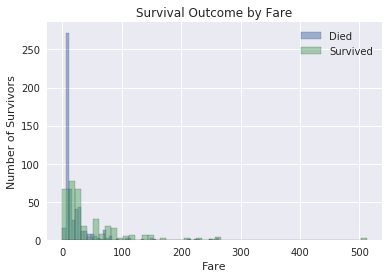

In [11]:
fig = plt.figure();
ax = fig.add_subplot(111);
fare_deceased.hist(bins=50, edgecolor='k', alpha=0.5, ax=ax);
fare_survived.hist(bins=50, edgecolor='k', ax=ax, alpha=0.5);
ax.set_title('Survival Outcome by Fare');
ax.set_xlabel('Fare');
ax.set_ylabel('Number of Survivors');
ax.legend(['Died', 'Survived']);

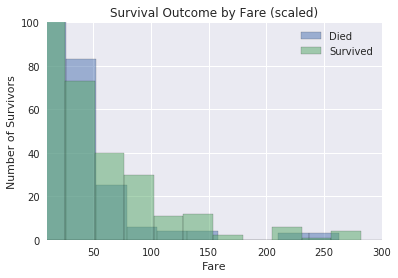

In [12]:
fig = plt.figure();
ax = fig.add_subplot(111);
fare_deceased.hist(bins=10, edgecolor='k', alpha=0.5, ax=ax);
fare_survived.hist(bins=20, edgecolor='k', ax=ax, alpha=0.5);
ax.set_title('Survival Outcome by Fare (scaled)');
ax.set_xlabel('Fare');
ax.set_ylabel('Number of Survivors');
ax.set_xlim([10, 300]);
ax.set_ylim([0, 100]);
ax.legend(['Died', 'Survived']);

In [13]:
sibsp_survived = training_data[training_data['Survived'] == 1]['SibSp']
sibsp_deceased = training_data[training_data['Survived'] == 0]['SibSp']

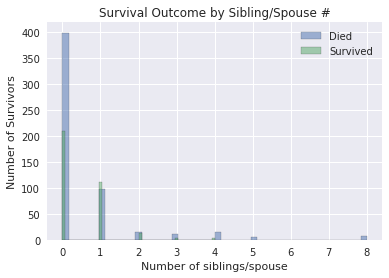

In [14]:
fig = plt.figure();
ax = fig.add_subplot(111);
sibsp_deceased.hist(bins=50, edgecolor='k', alpha=0.5, ax=ax);
sibsp_survived.hist(bins=50, edgecolor='k', ax=ax, alpha=0.5);
ax.set_title('Survival Outcome by Sibling/Spouse #');
ax.set_xlabel('Number of siblings/spouse');
ax.set_ylabel('Number of Survivors');
ax.legend(['Died', 'Survived']);

In [15]:
parch_survived = training_data[training_data['Survived'] == 1]['Parch']
parch_deceased = training_data[training_data['Survived'] == 0]['Parch']

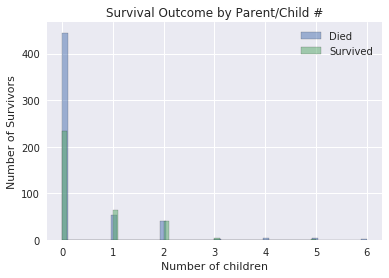

In [16]:
fig = plt.figure();
ax = fig.add_subplot(111);
parch_deceased.hist(bins=50, edgecolor='k', alpha=0.5, ax=ax);
parch_survived.hist(bins=50, edgecolor='k', ax=ax, alpha=0.5);
ax.set_title('Survival Outcome by Parent/Child #');
ax.set_xlabel('Number of children');
ax.set_ylabel('Number of Survivors');
ax.legend(['Died', 'Survived']);

Visualization of the raw data suggests correlations between class, sex, age, and port of embarkation on survival probability. There appears to be a correlation between between fare and survival probability; however, I believe that this correlation is also captured by class (as upper class likely paid more for their tickets). For the first analysis, I'm only going to consider class, sex, age, and port of embarkation.

## Data Preprocessing

### Sex

In [17]:
training_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There are no missing values in the Sex column (male (577) + female (314) = 891, total size of dataset); thus, these values can be encoded for model fitting.

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
sex_encoded = le.fit_transform(training_data['Sex'])

In [19]:
training_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Class

There are no missing values in the Pclass column.

In [20]:
class_encoded = le.fit_transform(training_data['Pclass'])

In [21]:
training_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Port of Embarkation

There are two missing values in the Embarked column.

In [22]:
training_data[training_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Both of the missing ports correspond to first class passengers. The preliminary visualization showed the least correlation between Cherbourg and survival probability; thus, I'll set the missing values to 'C'.

In [23]:
training_data['Embarked'].fillna('C', inplace=True);

In [24]:
training_data['Embarked'].value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [25]:
embarked_encoded = le.fit_transform(training_data['Embarked'])

### Age

In [26]:
training_data['Age'].isnull().sum()

177

There are 177 instances of missing ages. Given the correlation between age and survival probability, it is important that these instances are reasonably estimated. Given the passenger names, an estimate of age can be made as all passengers include titles. Master = young male, Miss = young female, Mr./Mrs. = adult, Dr. = adult. 

In [27]:
training_data[training_data['Age'].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [28]:
training_data['Title'] = training_data['Name'].str.split().str.get(1)

In [29]:
training_data[training_data['Age'].isnull()]['Title'].value_counts()

Mr.           117
Miss.          36
Mrs.           17
Master.         4
y               1
Melkebeke,      1
Dr.             1
Name: Title, dtype: int64

In [30]:
training_data['Title'] = training_data['Title'].str.replace('Melkebeke,', 'Mr.');

In [31]:
training_data['Title'].iloc[547] = 'Mr.'

/usr/lib/python3/dist-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
training_data.iloc[547]

PassengerId                           548
Survived                                1
Pclass                                  2
Name           Padro y Manent, Mr. Julian
Sex                                  male
Age                                   NaN
SibSp                                   0
Parch                                   0
Ticket                      SC/PARIS 2146
Fare                              13.8625
Cabin                                 NaN
Embarked                                C
Title                                 Mr.
Name: 547, dtype: object

In [33]:
training_data[training_data['Age'].isnull()]['Title'].value_counts()

Mr.        119
Miss.       36
Mrs.        17
Master.      4
Dr.          1
Name: Title, dtype: int64

In [34]:
training_data[training_data['Title'] == "Dr."]['Age'].describe()

count     6.000000
mean     42.000000
std      12.016655
min      23.000000
25%      35.000000
50%      46.500000
75%      49.750000
max      54.000000
Name: Age, dtype: float64

All the titles have been corrected for the passengers with missing ages. To estimate the age of these passengers, I'm going to randomly draw a number from between the 25th and 75th percentiles, except for the lone doctor, who I will assign the average value for doctor (42).
* Miss: 14 to 30
* Mr.: 23 to 39
* Mrs.: 28 to 44
* Master.: 1 to 8

In [35]:
ages_titles = training_data[['Age', 'Title']]

In [36]:
miss_ages = ages_titles[(ages_titles['Age'].isnull()) & (ages_titles['Title'] == 'Miss.')
                       ]['Age'].apply(lambda x: np.random.randint(14, high=31));
mr_ages = ages_titles[(ages_titles['Age'].isnull()) & (ages_titles['Title'] == 'Mr.')
                       ]['Age'].apply(lambda x: np.random.randint(23, high=40));
master_ages = ages_titles[(ages_titles['Age'].isnull()) & (ages_titles['Title'] == 'Master.')
                       ]['Age'].apply(lambda x: np.random.randint(1, high=9));
mrs_ages = ages_titles[(ages_titles['Age'].isnull()) & (ages_titles['Title'] == 'Mrs.')
                       ]['Age'].apply(lambda x: np.random.randint(28, high=45));
dr_ages = ages_titles[(ages_titles['Age'].isnull()) & (ages_titles['Title'] == 'Dr.')
                       ]['Age'].apply(lambda x: np.random.randint(42, high=43));

In [37]:
known_ages = ages_titles[ages_titles['Age'].isnull() == False]['Age']

In [38]:
prepped_ages = pd.concat([miss_ages, mr_ages, mrs_ages, master_ages, dr_ages, known_ages]);
prepped_ages = prepped_ages.sort_index();
parch = training_data['Parch'];
sibsp = training_data['SibSp'];

## Model Generation

In [39]:
X = pd.DataFrame([sex_encoded, class_encoded, prepped_ages, embarked_encoded]).transpose()

In [40]:
y = training_data['Survived']

**Gaussian Naive Bayes**

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = gnb_model, X = X, y = y, cv = 10)
print('Accuracy: ', accuracies.mean(), '+/-', accuracies.std())

Accuracy:  0.780082283509 +/- 0.0201206306081


**SVM**

In [42]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', random_state=0, C=10E5)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svc_model, X = X, y = y, cv = 10)
print('Accuracy: ', accuracies.mean(), '+/-', accuracies.std())

Accuracy:  0.774425717853 +/- 0.0288155139561


**Decision Tree**

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier();
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = tree, X = X, y = y, cv = 10)
print('Accuracy: ', accuracies.mean(), '+/-', accuracies.std())

Accuracy:  0.784512824878 +/- 0.0406711975691


**Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=0, criterion='entropy', max_features=4)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf_model, X = X, y = y, cv = 10)
print('Accuracy: ', accuracies.mean(), '+/-', accuracies.std())

Accuracy:  0.796847974123 +/- 0.0299640736453


**K Nearest Neighbors**

In [45]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = neigh, X = X, y = y, cv = 10)
print('Accuracy: ', accuracies.mean(), '+/-', accuracies.std())

Accuracy:  0.759982124617 +/- 0.0342058182948


**AdaBoost**

In [46]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(n_estimators=1000)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = neigh, X = X, y = y, cv = 10)
print('Accuracy: ', accuracies.mean(), '+/-', accuracies.std())

Accuracy:  0.759982124617 +/- 0.0342058182948


**Fit RF Model**

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=0, criterion='entropy', max_features=4)
rf_model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [48]:
test_data = pd.read_csv('test.csv')

In [49]:
test_data['Age'].isnull().sum()

86

In [50]:
test_sex_encoded = le.fit_transform(test_data['Sex'])
test_embarked_encoded = le.fit_transform(test_data['Embarked'])
test_class_encoded = le.fit_transform(test_data['Pclass'])

In [51]:
test_data['Title'] = test_data['Name'].str.split().str.get(1)

In [52]:
test_data[test_data['Age'].isnull()]['Title'].value_counts()
test_data['Title'] = test_data['Title'].str.replace('Billiard,', 'Master.');

In [53]:
test_data['Title'] = test_data['Title'].str.replace('Ms.', 'Miss.');
test_data[test_data['Age'].isnull()]['Title'].value_counts()


Mr.        57
Miss.      15
Mrs.       10
Master.     4
Name: Title, dtype: int64

In [54]:
test_ages_titles = test_data[['Age', 'Title']]

In [55]:
test_miss_ages = test_ages_titles[(test_ages_titles['Age'].isnull()) & (test_ages_titles['Title'] == 'Miss.')
                       ]['Age'].apply(lambda x: np.random.randint(14, high=31));
test_mr_ages = test_ages_titles[(test_ages_titles['Age'].isnull()) & (test_ages_titles['Title'] == 'Mr.')
                       ]['Age'].apply(lambda x: np.random.randint(23, high=40));
test_master_ages = test_ages_titles[(test_ages_titles['Age'].isnull()) & (test_ages_titles['Title'] == 'Master.')
                       ]['Age'].apply(lambda x: np.random.randint(1, high=9));
test_mrs_ages = test_ages_titles[(test_ages_titles['Age'].isnull()) & (test_ages_titles['Title'] == 'Mrs.')
                       ]['Age'].apply(lambda x: np.random.randint(28, high=45));


In [56]:
test_ages = test_ages_titles[test_ages_titles['Age'].isnull() == False]['Age']

In [57]:
test_prepped_ages = pd.concat([test_miss_ages, test_mr_ages, test_mrs_ages, test_master_ages, test_ages]);
test_prepped_ages = test_prepped_ages.sort_index();

In [58]:
Xtest = pd.DataFrame([test_sex_encoded, test_class_encoded, test_prepped_ages, test_embarked_encoded]).transpose()

In [59]:
yfit = rf_model.predict(Xtest)

In [60]:
passenger_id = test_data['PassengerId']

In [61]:
submission = pd.DataFrame([passenger_id, yfit], index=['PassengerID', 'Survived'])

In [62]:
submission = submission.T 

In [63]:
submission.to_csv('submission.csv', columns=['PassengerID', 'Survived'], index=False)